In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

files = glob.glob('simulation_*.csv')

In [61]:
# Liste pour stocker les DataFrames
dfs = []

# Lire chaque fichier et l'ajouter à la liste des DataFrames
for file in files:
    df = pd.read_csv(file)
    dfs.append(df)


In [62]:

# Initialiser un dataframe vide avec les mêmes colonnes que vos dataframes
Resultat = pd.DataFrame(columns=['S', 'E', 'I', 'R'])

# Pour chaque colonne, calculez la moyenne des éléments correspondants 
# de tous les dataframes dans dfs
for col in ['S', 'E', 'I', 'R']:
    Resultat[col] = sum([df[col] for df in dfs]) / len(dfs)


In [63]:
Resultat['Day'] = range(1, len(Resultat) + 1)
Resultat = Resultat[['Day', 'S', 'E', 'I', 'R']]


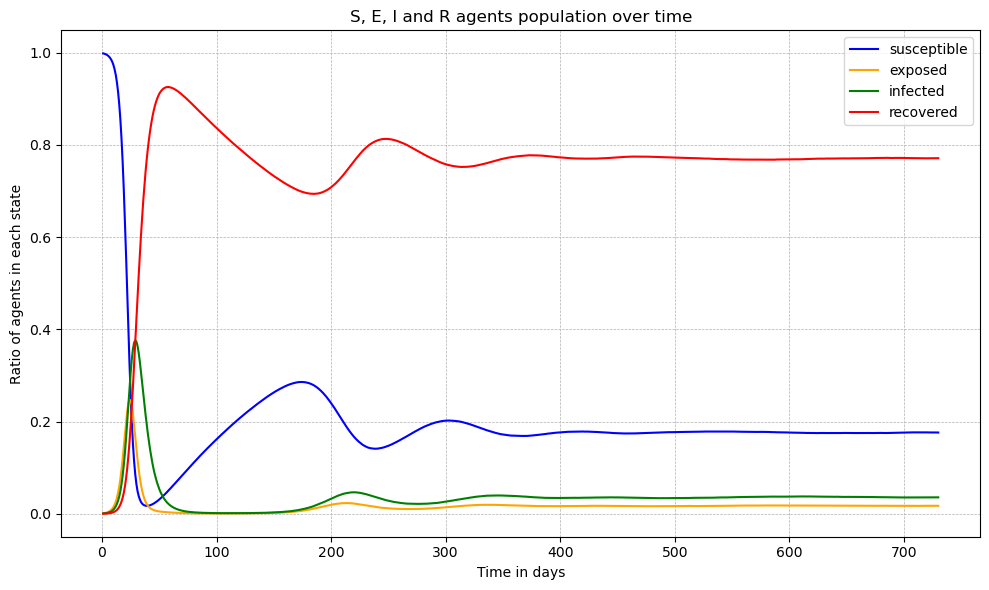

In [64]:
# Calculer les pourcentages de S, E, I et R
total_agents = Resultat['S'] + Resultat['E'] + Resultat['I'] + Resultat['R']
Resultat['S_percentage'] = (Resultat['S'] / total_agents) 
Resultat['E_percentage'] = (Resultat['E'] / total_agents) 
Resultat['I_percentage'] = (Resultat['I'] / total_agents) 
Resultat['R_percentage'] = (Resultat['R'] / total_agents)

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(Resultat['Day'], Resultat['S_percentage'], label='susceptible', color='blue')
plt.plot(Resultat['Day'], Resultat['E_percentage'], label='exposed', color='orange')
plt.plot(Resultat['Day'], Resultat['I_percentage'], label='infected', color='green')
plt.plot(Resultat['Day'], Resultat['R_percentage'], label='recovered', color='red')

plt.xlabel('Time in days')
plt.ylabel('Ratio of agents in each state')
plt.title('S, E, I and R agents population over time')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Afficher le graphique
plt.tight_layout()
plt.show()


